In [1]:
#Import necesseray packages
from scipy import stats
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data cleaning and wrangling

In [2]:
#Import pandas and read Breast Cancer CSV file
import pandas as pd

df=pd.read_csv('Desktop/Breast Cancer.csv')

In [3]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [4]:
#Check data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#checking If there are any missing data points in the data set
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#Dropping ID and Un-named columns
df=df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
#Look data statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


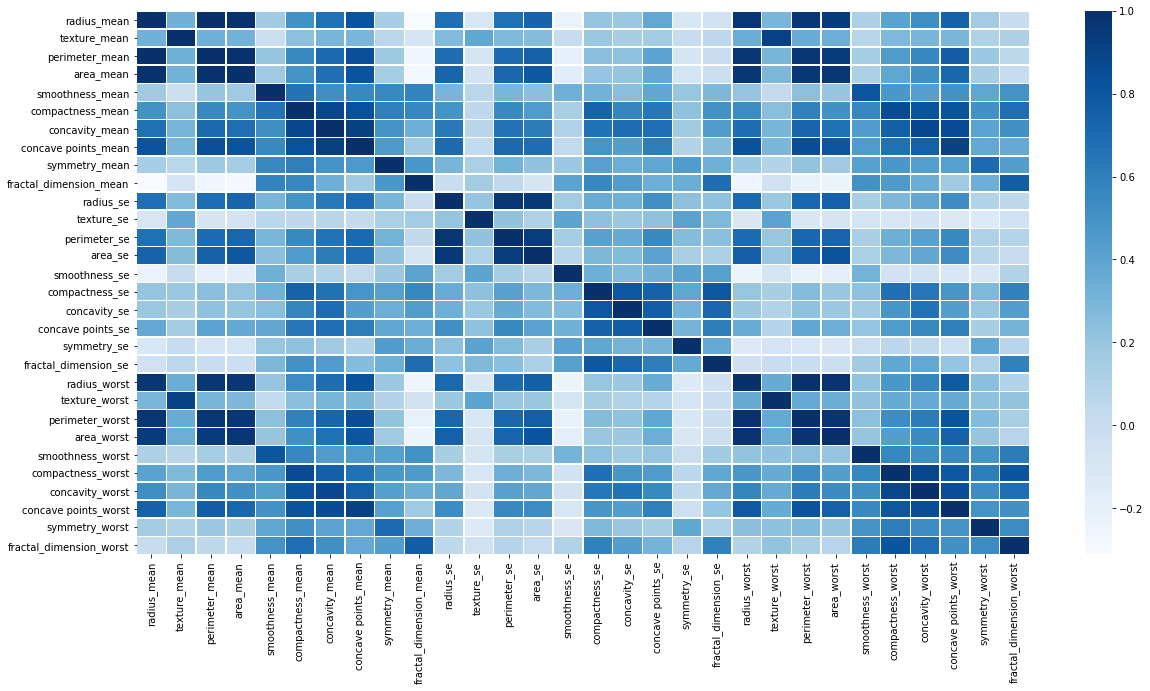

In [8]:
#Creating a heat map
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='Blues',linewidths=.5)

# Reducing Features

As each feature has 3 corresponding columns - worst, mean, and standard error, I thought it prudent to mitigate  multicollinearity which may result. As such, I used logistic regression to select the best predictor in each group of features between worst, mean, and standard error


In [9]:
# Build target variable
df['Malignant']=(df["diagnosis"]=="M")*1
y=df["Malignant"]

#Build independent variables
x=df[df.columns[1:]]

# Split data into Train and Test set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [10]:
#Get the best score and best predictor in each group
#Save the highest score predictors in best_col
best_cols = [] 
columns=[('radius_mean', 'radius_se', 'radius_worst'),('texture_mean', 'texture_se','texture_worst'),
                 ('perimeter_mean','perimeter_se','perimeter_worst'),('area_mean','area_se','area_worst'),
                 ('smoothness_mean','smoothness_se','smoothness_worst'),('compactness_mean','compactness_se',
                'compactness_worst'),('concavity_mean','concavity_se','concavity_worst'),('concave points_mean',
                'concave points_se','concave points_worst'),('symmetry_mean','symmetry_se','symmetry_worst'),
                 ('fractal_dimension_mean','fractal_dimension_se','fractal_dimension_worst')]

for col_type in columns:
    best_score = 0 
    for col in col_type: 
        lr=LogisticRegression()
        X_temp = X_train[[col]] 
        lr.fit(X_temp,y_train)
        X_tt=X_test[[col]]
        y_predicted_probabilities = lr.predict_proba(X_tt)[:,1] 
        score = roc_auc_score(y_true = y_test, y_score = y_predicted_probabilities)
        print (col, score)
        if score > best_score: 
            best_score = score 
            best_col = col 
             
    best_cols.append(best_col) 

radius_mean 0.9547475389012384
radius_se 0.863766275007939
radius_worst 0.9834868212130835
texture_mean 0.7740552556367102
texture_se 0.4434741187678628
texture_worst 0.7792950142902508
perimeter_mean 0.9612575420768499
perimeter_se 0.8723404255319148
perimeter_worst 0.9882502381708479
area_mean 0.9574468085106383
area_se 0.9348999682438869
area_worst 0.9834868212130836
smoothness_mean 0.7297554779295015
smoothness_se 0.5200063512226103
smoothness_worst 0.7373769450619244
compactness_mean 0.8396316290885997
compactness_se 0.7503969514131471
compactness_worst 0.8512226103524928
concavity_mean 0.9431565576373452
concavity_se 0.821530644649095
concavity_worst 0.9310892346776756
concave points_mean 0.9660209590346143
concave points_se 0.7999364877738965
concave points_worst 0.9650682756430613
symmetry_mean 0.686090822483328
symmetry_se 0.5347729437916799
symmetry_worst 0.744522070498571
fractal_dimension_mean 0.48269291838678946
fractal_dimension_se 0.6373451889488727
fractal_dimension_wor

In [11]:
best_cols

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_mean',
 'concave points_mean',
 'symmetry_worst',
 'fractal_dimension_worst']

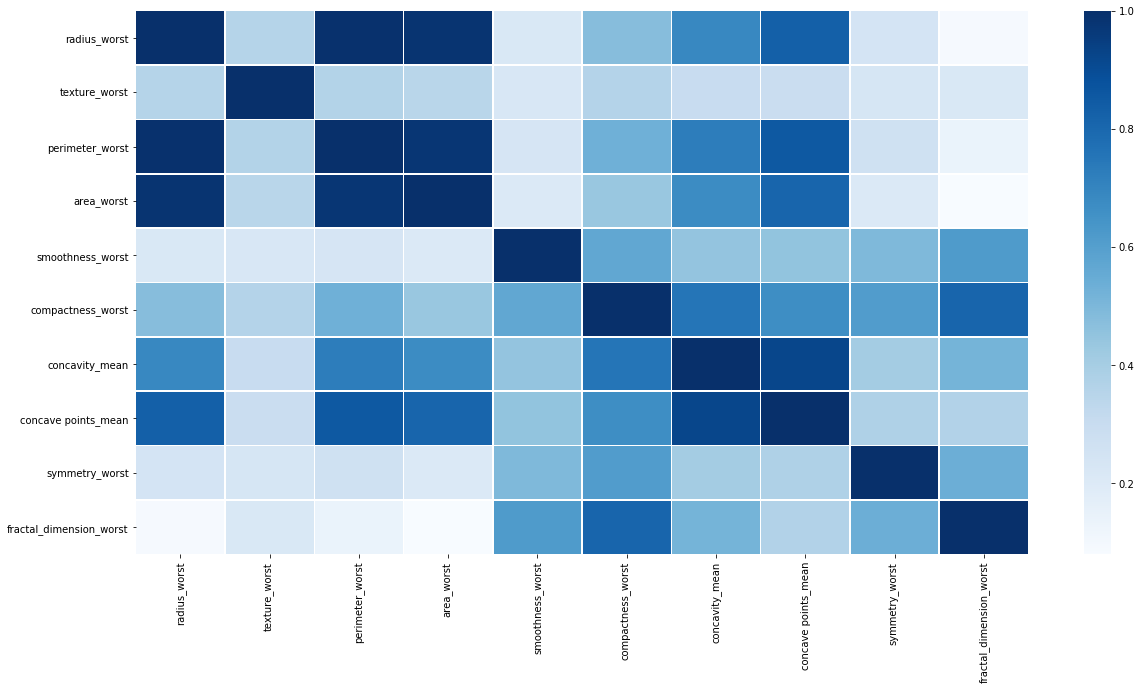

In [12]:
#Create heat map for the best colomuns
plt.figure(figsize=(20,10))
sns.heatmap(df[best_cols].corr(),cmap='Blues',linewidths=.5)

Since I don’t want to assume that there were no good features in each group other than the “best” one, I have also calculated the correlation between the best feature and the other two features in the same group to confirm that multicollinearity is an issue. If the correlation were smaller than .5 between the two features I would also add it to my best features list.

In [13]:
for i in range(len(best_cols)):
    for c in range(len(columns)):
        if i==c:
            for j in columns[c]:
                try:
                    sonuc=df[[best_cols[i],j]].corr().iloc[0][1]
                    if sonuc<0.5:
                        best_cols.append(j)
                except:
                    pass

In [14]:
#Updated best_cols
best_cols

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_mean',
 'concave points_mean',
 'symmetry_worst',
 'fractal_dimension_worst',
 'texture_se',
 'smoothness_se',
 'symmetry_se']

In [15]:
#Calculate pearson correlation and the p-value for testing non-correlation
#Add the not significant combinations into Notsignificant empty list
notsignificant=[]
combine=itertools.combinations(best_cols, 2)
for a in combine:
    cor=stats.pearsonr(df[a[0]],df[a[1]])
    if cor[1]>0.05:
        notsignificant.append(a)

In [16]:
#assign the value 0 for statistically not significant correlation 
df_cor=df[best_cols].corr()
for j in notsignificant:
    df_cor.loc[j[1],j[0]]=0

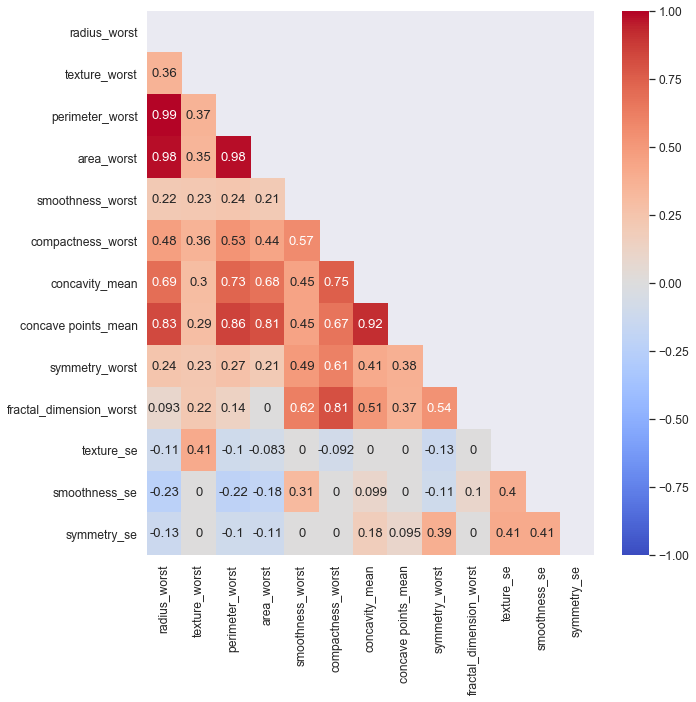

In [17]:
#the correlation matrix of the best features
#grayed out non-significant correlations between each two features group combinations
mask = np.zeros_like(df_cor)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.1)
plt.figure(figsize=(10,10))
sns.heatmap(df_cor,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
           mask=mask)

In [18]:
#create new DataFrame with the best_cols
dfnew=df[['diagnosis']].join(df[best_cols])

Created boxplots to show Malignant and Benign cells tend to have different characteristics which makes it seem promising that they can be distinguished with a predictive model.

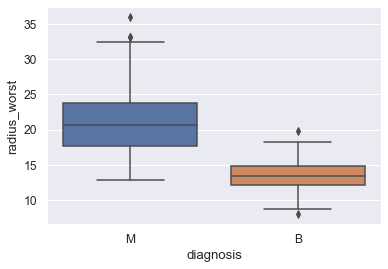

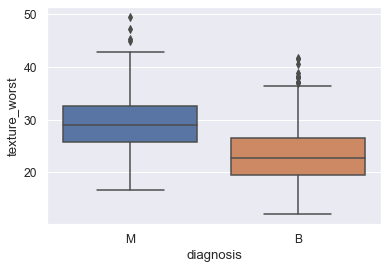

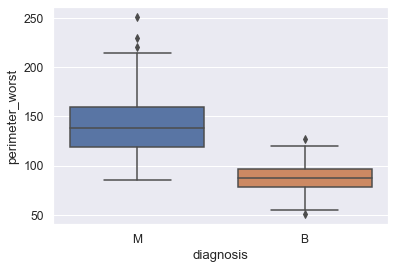

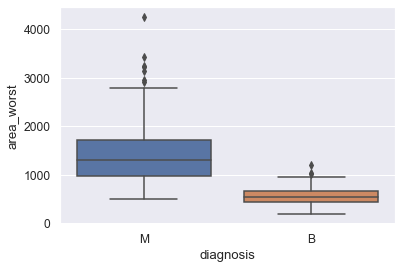

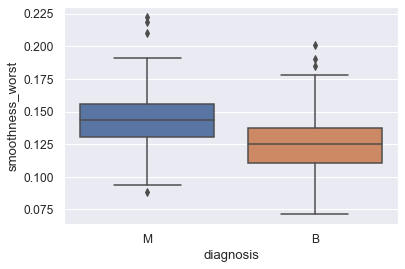

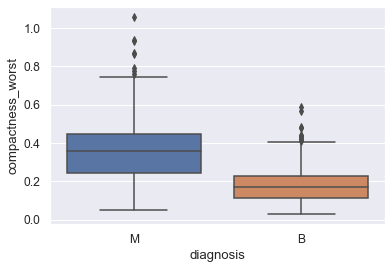

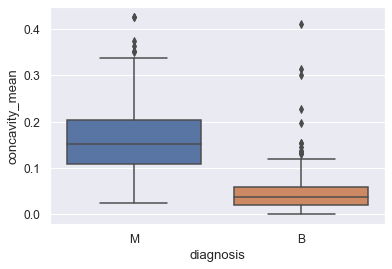

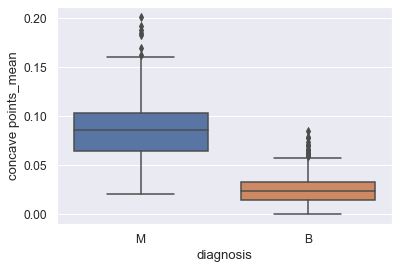

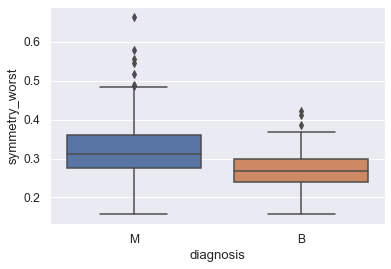

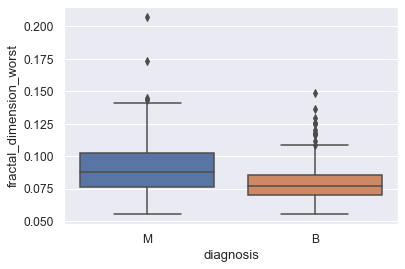

In [19]:
#Statistical testing using a t-test confirms that this relationship is statistically significant with p < .05
Mgroup=dfnew[dfnew.diagnosis=="M"]
Bgroup=dfnew[dfnew.diagnosis=="B"]
for a in dfnew.columns[1:]:
    if stats.ttest_ind(Mgroup[a],Bgroup[a],equal_var=False)[1]<0.05:
        plt.figure()
        sns.boxplot(x='diagnosis',y=a,data=dfnew)

&nbsp;

&nbsp;

#                                         Machine Learning 

In [20]:
#Import necesseray packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_precision_recall_curve

To get our model to work, we first need to map the categorical values to integer values. Each integer value is represented as a binary vector; 0 and 1.In our case, we mapped Malignant cells with 1 and Benign cells with 0 and created new column with the assigned values.

We assign our X and y variables based on the dfnew – the modified df where we added a new column. We predict the y – Benign or Malignant– given the X features.

The training will be done on 55% of the data. The remaining 45% will be our hold-out set that will be left untouched until the final model has been selected and tuned.

Before using of different supervised machine learning approaches we performed hyperparameter tuning to find out what estimators works most effectively. The metric used is roc_auc for accuracy over 5-fold cross-validation. Also, we used the different thresholds in the models to get the best score and best thresholds.


### 1-Logistic Regression

In [21]:
# Build target variable
dfnew['M']=(dfnew['diagnosis']=='M')*1
y=dfnew['M']

#Build independent variables
x=dfnew.iloc[:,1:-1]

In [22]:
# Split data into Train and Test set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=0)

``` python
# GridSearch to optimize paramater for Logistic Regression
param_grid={'C':np.arange(1,50)}
logreg=LogisticRegression()
logregcv=GridSearchCV(logreg,param_grid,cv=5,scoring='roc_auc')
logregcv.fit(X_train,y_train)
logregcv.best_params_
```

In [178]:
#Use Logistic Regression with the parameter of C=31
lrclasifier=LogisticRegression(C=31)
lrclasifier.fit(X_train,y_train)
y_prob=lrclasifier.predict_proba(X_test)[:,1]
y_pred=lrclasifier.predict(X_test)
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

In [179]:
precisionLogReg,recallLogReg,thresholdsLogReg=precision_recall_curve(y_test,y_prob)

In [180]:
#find the best thresholds and best score looping over the thresholds that I found 
threshold=[]
betascore=[]
for thresh in np.unique(y_prob):
    y_thresh=y_prob>thresh
    threshold.append(thresh)
    betascore.append(fbeta_score(y_test,y_thresh,beta=1.5))

Text(0.5, 1.0, 'Thresholds vs F-beta Score(Logistic Regression)')

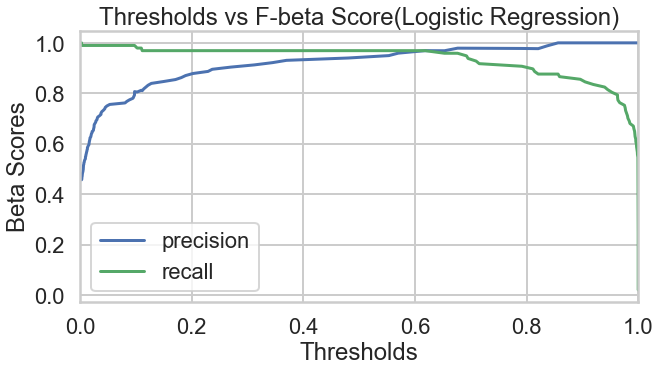

In [184]:
#Plotting the thresholds vs Beta Score
#Vertical line at optimal threshold
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(10,5))
plt.xlim(0,1)
#plt.axvline(threshold[np.argmax(betascore)], color='r')
plt.plot(thresholdsLogReg, precisionLogReg[:-1], 'b-', label='precision')
plt.plot(thresholdsLogReg, recallLogReg[:-1], 'g-', label = 'recall')
#plt.plot(threshold, betascore,color='black',label='threshold')
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("Beta Scores")
plt.title("Thresholds vs F-beta Score(Logistic Regression)")
#print('best threshold is:',threshold[np.argmax(betascore)])
#print('best score is:',max(betascore))

In [167]:
print('Logistic Regression Classification Report')

print(classification_report(y_test,y_pred))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       160
           1       0.95      0.97      0.96        97

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257



&nbsp;

### 2- KNeighborsClassifier 

``` python
#GridSearch to optimize paramater for KNeighbors Classifier
knnclasifier=KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(1,50)}
knn_cv=GridSearchCV(knnclasifier,param_grid,cv=5,scoring='roc_auc')
knn_cv.fit(X_train,y_train)
knn_cv.best_params_
```

In [168]:
#Use KNeighbors Classifier with the parameter of n_neighbors=39
knn=KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train,y_train)
y_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

In [169]:
precisionKnn,recallKnn,thresholdsKnn=precision_recall_curve(y_test,y_prob)

In [170]:
#find the best thresholds and best score looping over the thresholds that I found 
thresholdknn=[]
betascoreknn=[]
for thresh in np.unique(y_prob):
    y_thresh=y_prob>thresh
    thresholdknn.append(thresh)
    betascoreknn.append(fbeta_score(y_test,y_thresh,beta=1.5))

Text(0.5, 1.0, 'Thresholds vs F-beta Score(KNN)')

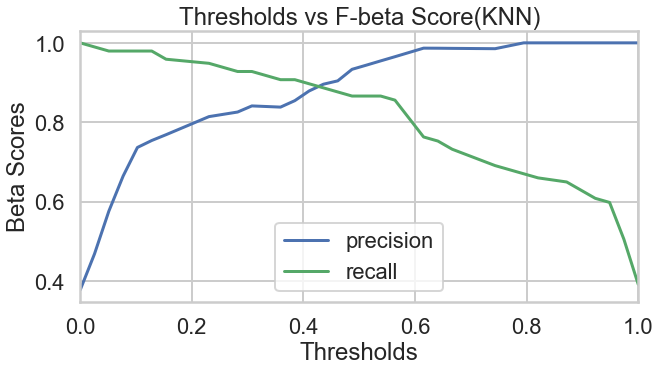

In [183]:
#Plotting the thresholds vs Beta Score
#Vertical line at optimal threshold
plt.figure(figsize=(10,5))
plt.xlim(0,1)
#plt.axvline(thresholdknn[np.argmax(betascoreknn)], color='r')
#plt.plot(thresholdknn, betascoreknn,color='green')
plt.plot(thresholdsKnn, precisionKnn[:-1], 'b-', label='precision')
plt.plot(thresholdsKnn, recallKnn[:-1], 'g-', label = 'recall')
plt.legend(loc='middle')
plt.xlabel("Thresholds")
plt.ylabel("Beta Scores")
plt.title("Thresholds vs F-beta Score(KNN)")
#print('best threshold is:',thresholdknn[np.argmax(betascoreknn)])
#print('best score is:',max(betascoreknn))

In [172]:
print('KNeighborsClassifier Classification Report')
print(classification_report(y_test, knn.predict(X_test)))

KNeighborsClassifier Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       160
           1       0.94      0.87      0.90        97

    accuracy                           0.93       257
   macro avg       0.93      0.92      0.92       257
weighted avg       0.93      0.93      0.93       257



&nbsp;

### 3-Random Forest Classifier

``` python
# GridSearch to optimize paramater for KNeighbors Classifier
rf=RandomForestClassifier( )
param_grid={'n_estimators':np.arange(90,120) ,'max_depth':np.arange(5,20),'max_features':np.arange(1,5)}
rf_cv=GridSearchCV(rf,param_grid,cv=5,scoring='roc_auc')
rf_cv.fit(X_train,y_train)
rf_cv.best_params_
```

In [173]:
#Use RandomForestClassifier with the best parameters 
rf=RandomForestClassifier(max_depth=19,max_features=4,n_estimators=118 )
rf.fit(X_train,y_train)
y_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

In [174]:
precisionRF,recallRF,thresholdsRF=precision_recall_curve(y_test,y_prob)

In [175]:
#find the best thresholds and best score looping over the thresholds that I found 
thresholdrf=[]
betascorerf=[]
for thresh in thresholds:
    y_thresh=y_prob>thresh
    thresholdrf.append(thresh)
    betascorerf.append(fbeta_score(y_test,y_thresh,beta=1.5))

Text(0.5, 1.0, 'Thresholds vs F-beta Score(Random Forest)')

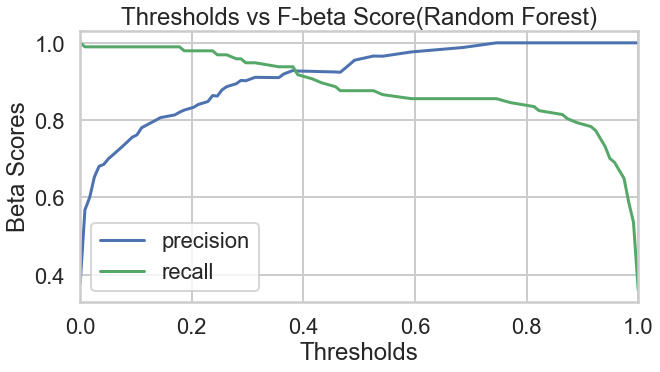

In [187]:
#Plotting the thresholds vs Beta Score
#Vertical line at optimal threshold
plt.figure(figsize=(10,5))
plt.xlim(0,1)
#plt.axvline(thresholdrf[np.argmax(betascorerf)], color='r')
#plt.plot(thresholdrf, betascorerf,color='green')
plt.plot(thresholdsRF, precisionRF[:-1], 'b-', label='precision')
plt.plot(thresholdsRF, recallRF[:-1], 'g-', label = 'recall')
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("Beta Scores")
plt.title("Thresholds vs F-beta Score(Random Forest)")
#print('best threshold is:',thresholdrf[np.argmax(betascorerf)])
#print('best score is:',max(betascorerf))

In [177]:
print('Randon Forest Classifier Classification Report')
print(classification_report(y_test, knn.predict(X_test)))

Randon Forest Classifier Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       160
           1       0.94      0.87      0.90        97

    accuracy                           0.93       257
   macro avg       0.93      0.92      0.92       257
weighted avg       0.93      0.93      0.93       257



&nbsp;

### Detecting multicollinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import glm
import statsmodels.api as sm

In [43]:
#Created a new df to be able to standardize all features
X=dfnew.iloc[::,1:-1]

In [44]:
#Scaled all features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [45]:
#Converded list of arrays into df
scaled_df = pd.DataFrame(scaled_data ,columns=X.columns)

In [46]:
#Created a new df to calculate a Variance Inflation Factor scores
vif1 = pd.DataFrame()
vif1["variables"] = scaled_df.columns

In [47]:
vif1["VIF"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]

In [48]:
vif1

,variables,VIF
0,radius_worst,154.287634
1,texture_worst,2.389733
2,perimeter_worst,148.501728
3,area_worst,39.614820
4,smoothness_worst,3.429665
5,compactness_worst,9.557115
6,concavity_mean,11.482680
7,concave points_mean,17.139147
8,symmetry_worst,3.896686
9,fractal_dimension_worst,5.453913


```python 
As we can see on the VIF table above, radius_worst,perimeter_worst and area_worst have high variation inflation factor because they explain same variance.We will drop the two features that has the highest two variance.Also,concavity_mean and concave points_mean are higly correlated and they have high vif so we will drop the concave points_mean as well
```

In [49]:
#Dropped the features which has the highest variation inflation factor scores
scaled_df2=scaled_df.drop(['area_worst','perimeter_worst','concave points_mean'],axis=1)

In [50]:
vif2 = pd.DataFrame()
vif2["variables"] = scaled_df2.columns

In [51]:
vif2["VIF"] = [variance_inflation_factor(scaled_df2.values, i) for i in range(scaled_df2.shape[1])]

In [52]:
vif2

,variables,VIF
0,radius_worst,3.623543
1,texture_worst,2.251366
2,smoothness_worst,2.973325
3,compactness_worst,7.466057
4,concavity_mean,4.989982
5,symmetry_worst,3.858735
6,fractal_dimension_worst,4.961288
7,texture_se,2.614840
8,smoothness_se,2.553547
9,symmetry_se,3.402587


As we can see above, after dropping area_worst,perimeter_worst and concave points_mean features from the df, VIF scores are decreased

In [53]:
#Creating statmodels
all_features="+".join(scaled_df2.columns)
model_GLM = glm(formula = 'dfnew.M~'+all_features,data = scaled_df2, family = sm.families.Binomial()).fit() 

In [54]:
#Model Summary
model_GLM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                dfnew.M   No. Observations:                  569
Model:                            GLM   Df Residuals:                      558
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 May 2020   Deviance:                          nan
Time:                        15:58:30   Pearson chi2:                 1.13e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.5290      0.360     -1.470      0.141      -1.234       0.176
radius_worst                7.2044      1.247      5.779      0.000       4.761       9.648
texture_worst               1.7992      0.470      3.826      0.000       0.878       2.721
smoothness_worst            1.5390      0.612      2.513      0.012       0.339       2.739
compactness_worst          -0.9534      0.852     -1.120      0.263      -2.623       0.716
concavity_mean              2.4454      0.752      3.253      0.001       0.972       3.919
symmetry_worst              1.0986      0.722      1.521      0.128      -0.317       2.514
fractal_dimension_worst    -0.2440      0.790     -0.309      0.758      -1.793       1.305
texture_se                 -0.1599      0.543     -0.294      0.769      -1.225       0.905
smoothness_se               0.1426      0.635      0.225      0.822      -1.102       1.388
symmetry_se                -0.4523      0.769     -0.588      0.556      -1.959       1.054
===========================================================================================
"""

In [55]:
#unscaled data to figure out what the actual effect of a one unit increase has
Xnew=X.drop(['area_worst','perimeter_worst','concave points_mean'],axis=1)
all_featuresx="+".join(Xnew.columns)
model_GLM = glm(formula = 'dfnew.M~'+all_featuresx,data = X, family = sm.families.Binomial()).fit() 

In [56]:
model_GLM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                dfnew.M   No. Observations:                  569
Model:                            GLM   Df Residuals:                      558
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 May 2020   Deviance:                          nan
Time:                        15:58:30   Pearson chi2:                 1.13e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -45.3158      7.612     -5.953      0.000     -60.236     -30.396
radius_worst                1.4919      0.258      5.779      0.000       0.986       1.998
texture_worst               0.2930      0.077      3.826      0.000       0.143       0.443
smoothness_worst           67.4631     26.849      2.513      0.012      14.840     120.086
compactness_worst          -6.0652      5.417     -1.120      0.263     -16.683       4.553
concavity_mean             30.7023      9.438      3.253      0.001      12.204      49.200
symmetry_worst             17.7735     11.682      1.521      0.128      -5.122      40.669
fractal_dimension_worst   -13.5205     43.802     -0.309      0.758     -99.370      72.329
texture_se                 -0.2901      0.986     -0.294      0.769      -2.223       1.642
smoothness_se              47.5474    211.746      0.225      0.822    -367.467     462.562
symmetry_se               -54.7622     93.082     -0.588      0.556    -237.201     127.676
===========================================================================================
"""